# Regressão linear com regularização

## Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as spio

## Importação dos dados

In [36]:
data = spio.loadmat('data/ex5data1.mat', squeeze_me=True)
X = data['X']
y = data['y']
X_test = data['Xtest']
y_test = data['ytest']
X_val = data['Xval']
y_val = data['yval']
m = len(y)
m_val = len(y_val)

## Visualização de dados

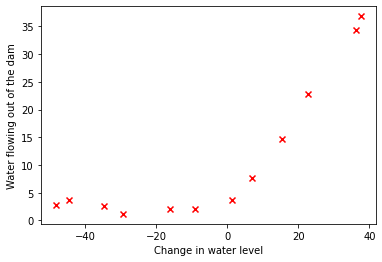

In [33]:
plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

## Função de custo

In [47]:
X_ones = np.stack([np.ones(m), X], axis=1)
X_val_ones = np.stack([np.ones(m_val), X_val], axis=1)

In [48]:
def compute_cost(theta, X, y, L):
    m = len(y)
    return (np.sum(np.power(X @ theta - y, 2)) / (2 * m)) - \
                (L / 2) * np.sum(np.square(theta))

m = len(y)
theta = np.ones(2)
compute_cost(theta, X_ones, y, 0)

303.9515255535976

## Gradiente

In [49]:
def gradient(theta, X, y, L):
    m = len(y)
    grad = (X.T @ ((X @ theta) - y)) / m
    grad[1:] = grad[1:] + (L / m) * theta[1:]
    return grad

gradient(theta, X_ones, y, 1)

array([-15.30301567, 598.25074417])

## Ajustando os parâmetros da regressão linear

[13.08790734  0.36777925]


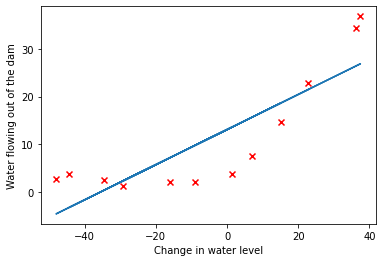

In [50]:
import scipy.optimize as opt

result = opt.fmin_cg(f=compute_cost, x0=theta, fprime=gradient, args=(X_ones, y, 0), disp=False)
print(result)
plt.scatter(X, y, color='red', marker='x')
plt.plot(X, X_ones @ result)
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

# Viés e variância

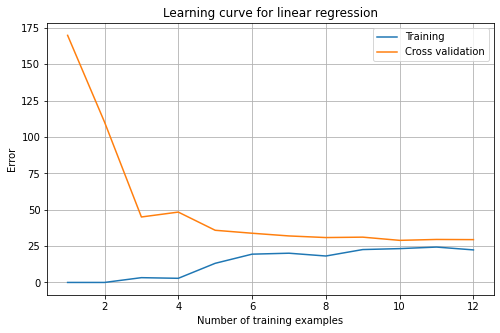

In [51]:
def compute_cost(theta, X, y, L):
    m = len(y)
    return (np.sum(np.power(X @ theta - y, 2)) / (2 * m)) - \
                (L / 2) * np.sum(np.square(theta))

def learning_curve(theta, X, y, X_val, y_val, L):
    m = len(y)
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(1, m + 1):
        theta_train = opt.fmin_cg(f=compute_cost, x0=theta, fprime=gradient, args=(X[:i], y[:i], L), disp=False)
        error_train[i - 1] = compute_cost(theta_train, X[:i], y[:i], L)
        error_val[i - 1] = compute_cost(theta_train, X_val, y_val, L)
    return error_train, error_val

error_train, error_val = learning_curve(theta, X_ones, y, X_val_ones, y_val, 0)

x_value = np.arange(1., len(error_train) + 1)
plt.figure(figsize=(8, 5))
plt.plot(x_value, error_train, label="Training")
plt.plot(x_value, error_val, label="Cross validation")
plt.legend(loc="upper right")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.title("Learning curve for linear regression")
plt.grid(True)
plt.show()